In [2]:
import sys
sys.path.append('..')

In [67]:
import numpy as np
import pandas as pd
import sklearn
from core.dataset import *
import xgboost as xgb
import matplotlib.pyplot as plt

In [4]:
load_dir = 'D:/Data/hoffmanlab/featureselection/data/'
ligands = ['CpG', 'FLA', 'FSL', 'LPS', 'P3K', 'PIC', 'R84', 'TNF']
sheet_type = 'am'

In [8]:
dataset = Data(load_dir, ligands, sheet_type, merge=True)

In [10]:
dataset.shape
# 14376 entries, 984 features, last column is the corresponding class label

(14376, 985)

In [34]:
X = dataset[:, [i for i in range(984)]]
y = dataset[:, [984]]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [37]:
model = xgb.XGBClassifier()

In [38]:
model.fit(X_train, y_train)

[17:04:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [52]:
pred = model.predict(X_val)

In [44]:
pred_df = pd.DataFrame(pred)
y_val_df = pd.DataFrame(y_val)

In [54]:
acc = 0
for x, y in zip(pred, y_val):
    if x == y:
        acc += 1

In [57]:
print(f'Default accuracy: {acc / len(y_val)}')

Default accuracy: 0.6467315716272601


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

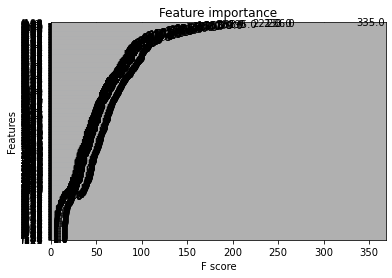

In [58]:
xgb.plot_importance(model)

In [65]:
feature_importance = model.feature_importances_

In [75]:
sorted_fi = model.feature_importances_.argsort()

In [81]:
sorted_fi[:30] # 10 most important features?

array([983, 774, 775, 776, 777, 464, 463, 462, 461, 460, 459, 773, 442,
       440, 439, 438, 778, 784, 785, 427, 426, 425, 424, 441, 423, 772,
       480, 758, 759, 760], dtype=int64)

#### a lot of the features (sorted by importance) are sequential
* 750ish - 800ish is power_xyz

In [87]:
test = pd.read_csv(load_dir + 'CpG_am.csv') # just using this as a placeholder to extract columns for plotting

In [92]:
import seaborn as sns

<AxesSubplot:>

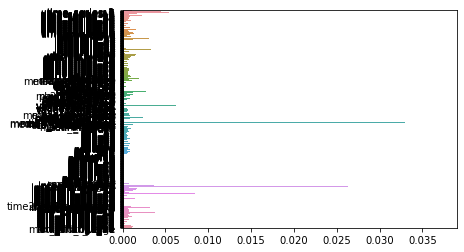

In [94]:
sns.barplot(x=feature_importance, y=test.columns)

#### data plots are too cluttered due to size of features

In [96]:
sorted_features = test.columns[sorted_fi]

In [98]:
sorted_features[:20] # 20 most important features

Index(['max_value', 'power_125', 'power_126', 'power_127', 'power_128',
       'num_peaks', 'ipt_15', 'ipt_14', 'ipt_13', 'ipt_12', 'ipt_11',
       'power_124', 'valley_amps_15', 'valley_amps_13', 'valley_amps_12',
       'valley_amps_11', 'power_129', 'integrals_pos_1', 'integrals_pos_2',
       'valley_times_15'],
      dtype='object')